In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data
crop = pd.read_csv(r'C:\Users\91984\Downloads\Crop_recommendation.csv')
crop.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
#maxabsscalar normalization
from sklearn.preprocessing import MaxAbsScaler

data = crop[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = crop['label']

scaler = MaxAbsScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[0.64285714 0.28965517 0.2097561  ... 0.82017609 0.65454715 0.67971415]
 [0.60714286 0.4        0.2        ... 0.80334204 0.70840786 0.75916214]
 [0.42857143 0.37931034 0.21463415 ... 0.82335685 0.78914298 0.88412428]
 ...
 [0.84285714 0.22758621 0.14634146 ... 0.67237309 0.64041769 0.58052911]
 [0.83571429 0.22068966 0.16585366 ... 0.52136843 0.680295   0.42596209]
 [0.74285714 0.12413793 0.14634146 ... 0.60407423 0.68241275 0.47205582]]


In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled,target,test_size = 0.2,random_state =2)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params_lr = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
          'solver' : ['newton-cg', 'lbfgs','liblinear','sag','saga'],
          'multi_class':['auto', 'ovr','multinomial']}
gs_lr = GridSearchCV(LogisticRegression(), params_lr, verbose=1, cv=10)
g_res_lr= gs_lr.fit(x_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.6min finished


In [6]:
g_res_lr.best_score_

0.9829545454545453

In [7]:
g_res_lr.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'sag'}

In [8]:
lr = LogisticRegression(penalty= 'none' ,solver='sag',multi_class='auto')
lr.fit(x_train,y_train)

LogisticRegression(penalty='none', solver='sag')

In [9]:
# Training & Testing accuracy after applying hyper parameter
lr_train_accuracy = lr.score(x_train,y_train)
print("lr_train_accuracy = ",lr.score(x_train,y_train))
#Print Test Accuracy
lr_test_accuracy = lr.score(x_test,y_test)
print("lr_test_accuracy = ",lr.score(x_test,y_test))

lr_train_accuracy =  0.9880681818181818
lr_test_accuracy =  0.9795454545454545


In [10]:
acc = []
model = []

In [11]:

from sklearn.metrics import classification_report
from sklearn import metrics

predicted_values = lr.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('LogisticRegression')
print("LR Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

LR Accuracy is:  0.9795454545454545
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00  

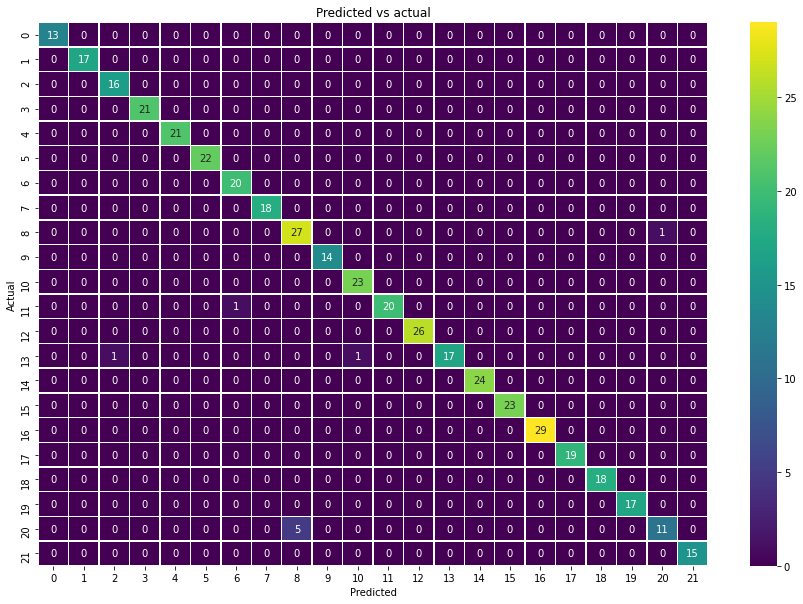

In [12]:
y_pred = lr.predict(x_test)
y_true = y_test

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_lr = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_lr, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()